# Question 1c - SVM for 1a

In [1]:
# importing modules 
import itertools
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import svm
from random import shuffle

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from tools import plot_confusion_matrix

In [2]:
# Getting the data from the spiraldataset.csv file 
import csv
from sklearn.svm import SVC
from numpy import arange, round, meshgrid, resize
import matplotlib.pyplot as plt

def read_two_spiral_file(filename="spiralsdataset.csv"):
    x = []
    y = []
    
    with open(filename) as csv_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            x.append(list(map(float, row[:-1])))
            y.append([int(row[-1])])

    return x, y

x, y = read_two_spiral_file()

In [3]:
t = SVC(C=0.8, kernel='rbf', gamma=0.75)

In [4]:
# fititng the SVM 
t.fit(x, y)

# calculating accuracy
accuracy = t.score(x, y)
print('Model accuracy:',accuracy*100,'%')

Model accuracy: 100.0 %


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


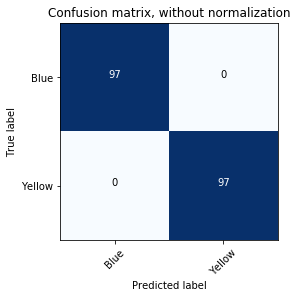

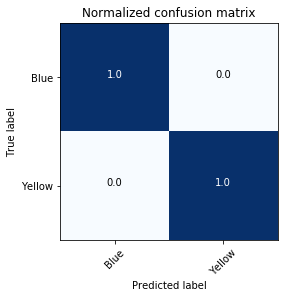

In [5]:
classifier = svm.SVC(C=0.8, kernel='rbf', gamma=0.75)

# making a confusion matrix for the model
predictions = classifier.fit(x, y).predict(x)

# class names for the confusion matrix
class_names = ["Blue", "Yellow"]

# making the un-normalized confusion matrix
cfm = confusion_matrix(y, predictions)
plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=False, title='Confusion matrix, without normalization')

# making the normalized confusion matrix
plt.figure()
plot_confusion_matrix(cfm, classes=class_names, normalize=True, title='Normalized confusion matrix')

plt.show()

In [6]:
# Calculating the sensitivity, specificity, precision and recall
t_p = 0
t_n = 0
f_p = 0
f_n = 0 
for i in range(len(y)):
    if predictions[i] == y[i]:
        if predictions[i] == 1:
            t_p += 1
        else:
            t_n += 1
    else:
        if predictions[i] == 1:
            f_p += 1
        else:
            f_n += 1

print('sensitivity = ' , t_p/(t_p + f_n))
print('specificity = ' , t_n/(t_n + f_p)) 
print('precision = ' , t_p/(t_p + f_p))
print('recall = ' , t_p/(t_p + f_n))

sensitivity =  1.0
specificity =  1.0
precision =  1.0
recall =  1.0


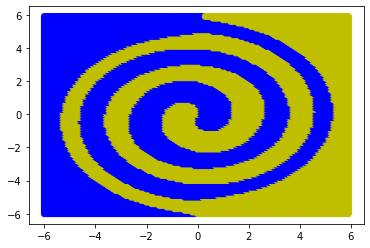

In [7]:
# Visualise activations
activation_range = arange(-6,6,0.1) # interval of [-6,6) with step size 0.1
coordinates = [(x,y) for x in activation_range for y in activation_range]
classifications = classifier.predict(coordinates)
x, y = meshgrid(activation_range, activation_range)
plt.scatter(x, y, c=['b' if x > 0 else 'y' for x in classifications])
plt.show()